In [4]:
from matplotlib.colors import LinearSegmentedColormap

# Parula-like RGB list (approximate)
parula_data = [
    [0.2081, 0.1663, 0.5292],
    [0.2116, 0.1898, 0.5777],
    [0.2123, 0.2138, 0.6270],
    [0.2081, 0.2386, 0.6771],
    [0.1959, 0.2645, 0.7279],
    [0.1707, 0.2919, 0.7792],
    [0.1253, 0.3242, 0.8303],
    [0.0591, 0.3598, 0.8683],
    [0.0117, 0.3875, 0.8820],
    [0.0060, 0.4086, 0.8828],
    [0.0165, 0.4266, 0.8786],
    [0.0329, 0.4430, 0.8720],
    [0.0498, 0.4586, 0.8641],
    [0.0629, 0.4737, 0.8554],
    [0.0723, 0.4887, 0.8467],
    [0.0779, 0.5040, 0.8384],
    [0.0793, 0.5200, 0.8312],
    [0.0749, 0.5375, 0.8263],
    [0.0641, 0.5570, 0.8240],
    [0.0488, 0.5772, 0.8228],
    [0.0343, 0.5966, 0.8199],
    [0.0265, 0.6137, 0.8135],
    [0.0239, 0.6287, 0.8038],
    [0.0231, 0.6418, 0.7913],
    [0.0228, 0.6535, 0.7768],
    [0.0267, 0.6642, 0.7607],
    [0.0384, 0.6743, 0.7436],
    [0.0590, 0.6838, 0.7254],
    [0.0843, 0.6928, 0.7062],
    [0.1133, 0.7015, 0.6859],
    [0.1453, 0.7098, 0.6646],
    [0.1801, 0.7177, 0.6424],
    [0.2178, 0.7250, 0.6193],
    [0.2586, 0.7317, 0.5954],
    [0.3022, 0.7376, 0.5712],
    [0.3482, 0.7424, 0.5473],
    [0.3953, 0.7459, 0.5244],
    [0.4420, 0.7481, 0.5033],
    [0.4871, 0.7491, 0.4840],
    [0.5300, 0.7491, 0.4661],
    [0.5709, 0.7485, 0.4494],
    [0.6099, 0.7473, 0.4337],
    [0.6473, 0.7456, 0.4188],
    [0.6834, 0.7435, 0.4044],
    [0.7184, 0.7411, 0.3905],
    [0.7525, 0.7384, 0.3768],
    [0.7858, 0.7356, 0.3633],
    [0.8185, 0.7327, 0.3498],
    [0.8507, 0.7299, 0.3360],
    [0.8824, 0.7274, 0.3217],
    [0.9139, 0.7258, 0.3063],
    [0.9450, 0.7261, 0.2886],
    [0.9739, 0.7314, 0.2666],
    [0.9938, 0.7455, 0.2403],
    [0.9990, 0.7653, 0.2164],
    [0.9955, 0.7861, 0.1967],
    [0.9880, 0.8066, 0.1794],
    [0.9789, 0.8271, 0.1633],
    [0.9697, 0.8481, 0.1475],
    [0.9626, 0.8705, 0.1309],
    [0.9589, 0.8949, 0.1132],
    [0.9598, 0.9218, 0.0948],
    [0.9661, 0.9514, 0.0755],
]

# Create custom colormap
parula_map = LinearSegmentedColormap.from_list("parula", parula_data)




The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


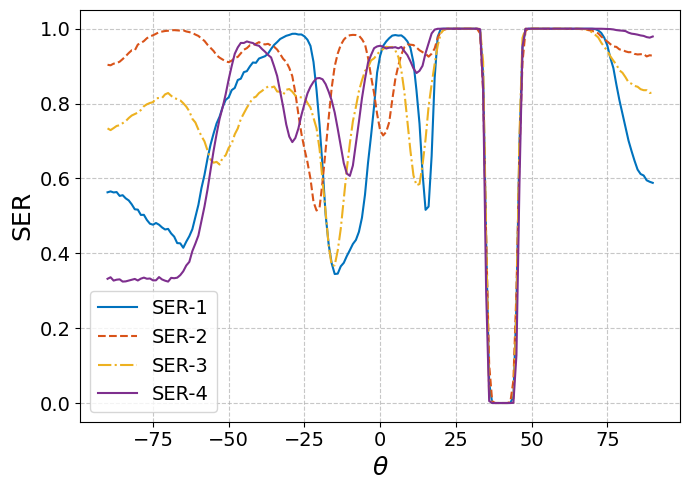

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

file_list = ['results_data1.npz', 'results_data2.npz', 'results_data3.npz', 'results_data4.npz']
matlab_colors = ['#0072BD', '#D95319', '#EDB120', '#7E2F8E', '#77AC30', '#4DBEEE', '#A2142F']
line_styles = ['-', '--', '-.', '-']

# Load all SER_vals
phi_fixed = 30
theta_list = np.arange(-90, 91, 1)
SER_vals_list = []

for file in file_list:
    data = np.load(file)
    SER_vals_list.append(data['SER_vals'])  # Extract SER_vals from each file

# Plot
fig, ax = plt.subplots(figsize=(7, 5))  # <<< use fig, ax

for i, SER_vals in enumerate(SER_vals_list):
    ax.plot(theta_list, SER_vals,
            label=f'SER-{i+1}',
            linewidth=1.5,
            linestyle=line_styles[i % len(line_styles)],
            color=matlab_colors[i % len(matlab_colors)]
           )

# Grid
ax.grid(True, linestyle='--', alpha=0.7)

# Axis labels
ax.set_xlabel(r'$\theta$', fontsize=18)
ax.set_ylabel('SER', fontsize=18)

# Tick labels
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

# Legend
ax.legend(fontsize=14)

# Save
plt.savefig('f2.eps', format='eps', bbox_inches='tight')

plt.tight_layout()
plt.show()


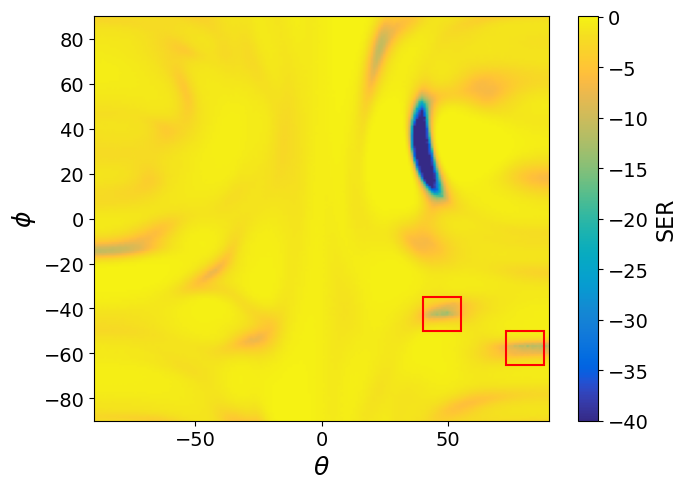

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Step 1: Define filenames
file_list = ['results_data1.npz', 'results_data2.npz', 'results_data3.npz', 'results_data4.npz']

# Step 2: Load SER_map from each file
SER_map_list = []

for file in file_list:
    data = np.load(file)
    SER_map_list.append(data['SER_map'])  # Load each SER_map

# Step 3: Compute the average SER_map
SER_map_avg = np.mean(SER_map_list, axis=0)  # Element-wise average

# Step 4: Prepare theta and phi grid
theta_step = 1
phi_step   = 1
theta_list = np.arange(-90, 91, theta_step)
phi_list   = np.arange(90, -91, -phi_step)

theta_len = len(theta_list)
phi_len   = len(phi_list)

# Step 5: Plot
fig, ax = plt.subplots(figsize=(7, 5))  # <<< use fig, ax

im = ax.imshow(
    SER_map_avg,
    origin='upper',
    extent=[theta_list[0], theta_list[-1], phi_list[-1], phi_list[0]],
    aspect='auto',
    cmap=parula_map
)

# Colorbar
cbar = plt.colorbar(im)
cbar.set_label('SER', fontsize=16)          # Colorbar label font size
cbar.ax.tick_params(labelsize=14)            # Colorbar tick labels size

# Axis labels
ax.set_xlabel(r'$\theta$', fontsize=18)      # x-axis label font size
ax.set_ylabel(r'$\phi$', fontsize=18)        # y-axis label font size

# Tick labels
ax.tick_params(axis='x', labelsize=14)       # x-axis tick labels size
ax.tick_params(axis='y', labelsize=14)       # y-axis tick labels size

# Grid
ax.grid(False)

# Add red rectangles
rect1 = patches.Rectangle((73, -65), 15, 15, linewidth=1.5, edgecolor='red', facecolor='none')
rect2 = patches.Rectangle((40, -50), 15, 15, linewidth=1.5, edgecolor='red', facecolor='none')

ax.add_patch(rect1)
ax.add_patch(rect2)

# Save figure
plt.savefig('f3.eps', format='eps', bbox_inches='tight')

plt.tight_layout()
plt.show()


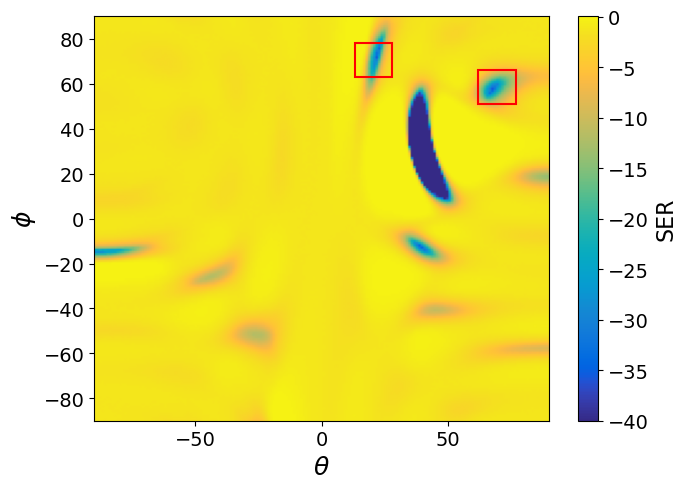

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Load data
data = np.load('results_data0.npz')
SER_map = data['SER_map']

# Plot
fig, ax = plt.subplots(figsize=(7, 5))  # <<< use fig, ax

im = ax.imshow(
    SER_map,
    origin='upper',
    extent=[theta_list[0], theta_list[-1], phi_list[-1], phi_list[0]],
    aspect='auto',
    cmap=parula_map
)

# Colorbar
cbar = plt.colorbar(im)
cbar.set_label('SER', fontsize=16)           # Colorbar label font size
cbar.ax.tick_params(labelsize=14)             # Colorbar tick labels size

# Axis labels
ax.set_xlabel(r'$\theta$', fontsize=18)       # x-axis label font size
ax.set_ylabel(r'$\phi$', fontsize=18)         # y-axis label font size

# Tick labels
ax.tick_params(axis='x', labelsize=14)         # x-axis tick labels size
ax.tick_params(axis='y', labelsize=14)         # y-axis tick labels size

# Grid
ax.grid(False)

# Add red rectangles
rect1 = patches.Rectangle((13, 63), 15, 15, linewidth=1.5, edgecolor='red', facecolor='none')
rect2 = patches.Rectangle((62, 51), 15, 15, linewidth=1.5, edgecolor='red', facecolor='none')

ax.add_patch(rect1)
ax.add_patch(rect2)

# Save figure
plt.savefig('f4.eps', format='eps', bbox_inches='tight')

plt.tight_layout()
plt.show()


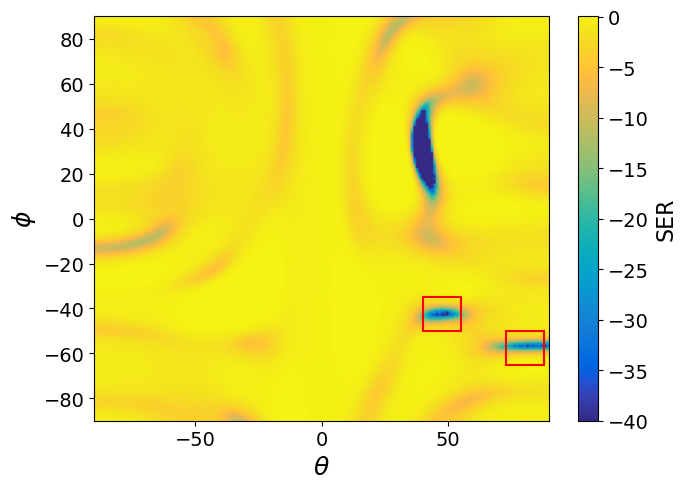

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Load data
data = np.load('results_data3.npz')
SER_map = data['SER_map']

# Plot
fig, ax = plt.subplots(figsize=(7, 5))  # <<< use fig, ax

im = ax.imshow(
    SER_map,
    origin='upper',
    extent=[theta_list[0], theta_list[-1], phi_list[-1], phi_list[0]],
    aspect='auto',
    cmap=parula_map  
)

# Colorbar
cbar = plt.colorbar(im)
cbar.set_label('SER', fontsize=16)            # Colorbar label font size
cbar.ax.tick_params(labelsize=14)              # Colorbar tick labels size

# Axis labels
ax.set_xlabel(r'$\theta$', fontsize=18)        # x-axis label font size
ax.set_ylabel(r'$\phi$', fontsize=18)          # y-axis label font size

# Tick labels
ax.tick_params(axis='x', labelsize=14)          # x-axis tick labels size
ax.tick_params(axis='y', labelsize=14)          # y-axis tick labels size

# Grid
ax.grid(False)

# Add red rectangles
rect1 = patches.Rectangle((73, -65), 15, 15, linewidth=1.5, edgecolor='red', facecolor='none')
rect2 = patches.Rectangle((40, -50), 15, 15, linewidth=1.5, edgecolor='red', facecolor='none')

ax.add_patch(rect1)
ax.add_patch(rect2)

# Save figure
plt.savefig('f5.eps', format='eps', bbox_inches='tight')

plt.tight_layout()
plt.show()
